In [3]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import webtfkeras as web

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
train_data, train_label, validation_data, validation_label, test_data, test_label = web.data_preparation_moe()
trained_model=web.main1()
predicted_indexes_moe=trained_model.predict(test_data)


Training data shape = (50000, 1)
Validation data shape = (50000, 1)
Test data shape = (50000, 1)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
m_mo_e_1 (MMoE)                 [(None, 16), (None,  288         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 8)            136         m_mo_e_1[0][0]                   
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 8)            136         m_mo_e_1[0][1]                   
____________

In [5]:
predicted_indexes_moe = predicted_indexes_moe[0]
predicted_indexes_moe=predicted_indexes_moe.squeeze()
import pandas as pd
predicted_indexes_moe_df = pd.DataFrame({'predicted_index':predicted_indexes_moe,'actual_index':test_label[0]})


In [6]:
error_in_index_moe=predicted_indexes_moe-test_label[0]

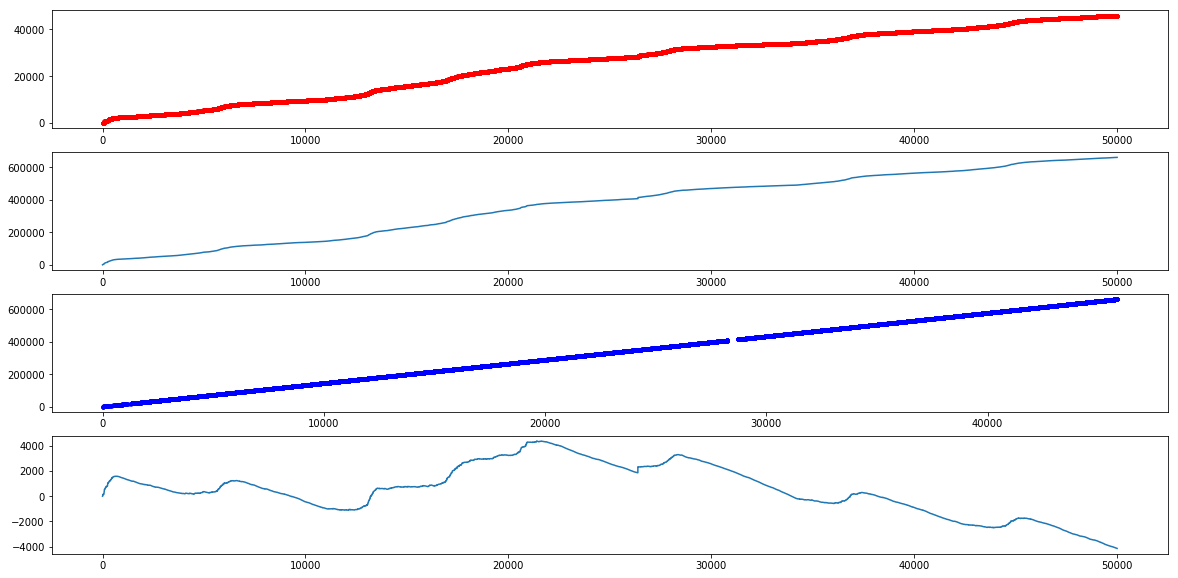

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(411)
ax.plot( predicted_indexes_moe_df.actual_index, predicted_indexes_moe_df.predicted_index,'r.');

ax = fig.add_subplot(412)
ax.plot(train_label[0] , train_data)

ax = fig.add_subplot(413)
ax.plot(predicted_indexes_moe_df.predicted_index , train_data, 'b.')

ax = fig.add_subplot(414)
ax.plot(train_label[0], error_in_index_moe)